# Сборный Проект — 1

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

• Name — название игры

• Platform — платформа

• Year_of_Release — год выпуска

• Genre — жанр игры

• NA_sales — продажи в Северной Америке (миллионы проданных копий)

• EU_sales — продажи в Европе (миллионы проданных копий)

• JP_sales — продажи в Японии (миллионы проданных копий)

• Other_sales — продажи в других странах (миллионы проданных копий)

• Critic_Score — оценка критиков (максимум 100)

• User_Score — оценка пользователей (максимум 10)

• Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Оглавление

- [Описание проекта](#Описание-проекта)
- [Описание данных](#Описание-данных)
- [Оглавление](#Оглавление)
- [Выполнению проекта](#Выполнению-проекта)
    - [Этап 1. Загрузка и изучение данных](#Этап-1.-Загрузка-и-изучение-данных)
        - [Подключим библиотеки.](#Подключим-библиотеки.)
        - [Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.](#Загрузим-данные-из-csv-файла-в-датафрейм-c-помощью-библиотеки-pandas.)
        - [Изучим общую информацию о полученном датафрейме.](#Изучим-общую-информацию-о-полученном-датафрейме.)
        - [Вывод: Загрузка и изучение данных](#Вывод:-Загрузка-и-изучение-данных.)
    - [Этап 2. Предобработка данных](#Этап-2.-Предобработка-данных)
        - [Заменим названия столбцов (приведем к нижнему регистру).](#Заменим-названия-столбцов-(приведем-к-нижнему-регистру).)
        - [Обработаем пропуски.](#Обработаем-пропуски.)
        - [Преобразуем данные в нужные типы.](#Преобразуем-данные-в-нужные-типы.)
        - [Обработка дубликатов.](#Обработка-дубликатов.)
        - [Вывод: Предобработка данных.](#Вывод:-Предобработка-данных.)
    - [Этап 3. Исследовательский анализ данных](#Этап-3.-Исследовательский-анализ-данных)
        - [Количество вышедших игр по годам.](#Количество-вышедших-игр-по-годам.)
        - [Продажи по платформам.](#Продажи-по-платформам.)
        - [Возьмем данные за соответствующий актуальный период.](#Возьмем-данные-за-соответствующий-актуальный-период.)
        - [Построим графики "ящиков с усами" по глобальным продажам игр и разбивкой по платформам](#Построим-графики-"ящиков-с-усами"-по-глобальным-продажам-игр-и-разбивкой-по-платформам.)
        - [Влияние отзывов на продажи.](#Влияние-отзывов-на-продажи.)
        - [Распределение игр по жанрам.](#Распределение-игр-по-жанрам.)
        - [Вывод: Исследовательский анализ данных.](#Вывод:-Исследовательский-анализ-данных.)
    - [Этап 4. Составьте портрет пользователя каждого региона](#Этап-4.-Составьте-портрет-пользователя-каждого-региона)
        - [Самые популярные платформы, жанры.](#Самые-популярные-платформы,-жанры.)
        - [Вывод: Составьте портрет пользователя каждого региона.](#Вывод:-Составьте-портрет-пользователя-каждого-региона.)
    - [Этап 5. Проверка статистических гипотез](#Этап-5.-Проверка-статистических-гипотез)
        - [Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#Гипотеза-№1.-Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые.)
        - [Гипотеза №2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#Гипотеза-№2.-Средние-пользовательские-рейтинги-жанров-Action-(англ.-«действие»,-экшен-игры)-и-Sports-(англ.-«спортивные-соревнования»)-разные.)
    - [Общий Вывод](#Общий-Вывод)

# Выполнению проекта

## Этап 1. Загрузка и изучение данных

### Подключим библиотеки.

In [1]:
# Библиотека для работы с данными
import pandas as pd

# Библиотека для создания графиков
import matplotlib.pyplot as plt

# Библиотека для создания статистических графиков
import seaborn as sns

# Библиотека для научных вычислений
import numpy as np

# Модуль stats из библиотеки scipy для работы со статистическими методами
from scipy import stats

### Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [2]:
try:
    data_games = pd.read_csv('/datasets/games.csv', sep = ',')
except:
    data_games = pd.read_csv('C:/Users/Marat_Yangurov/Jup_Notebook_Practicum/datasets/games.csv', sep = ',')
    
# Установка опции для отображения всех столбцов
pd.options.display.max_columns = None

Для последующей проверки процента очищенных данных посчитаем количество строк в DataFrame

In [3]:
#  Количество строк до обработки
initial_row_count_data_games = data_games.shape[0]
print(f'Количество строк до обработки таблицы data_games: {initial_row_count_data_games}')

Количество строк до обработки таблицы data_games: 16715


### Изучим общую информацию о полученном датафрейме.

In [4]:
data_games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод: Загрузка и изучение данных.

**Пропущенные значения**

Пропущенные значения в колонках - Name, Genre, Year_of_Release, Critic_Score, User_Score, Rating.

**Типы данных**

В датафрейме data_games, в колонке Year_of_Release, User_Score необходимо заменить тип данных.

Необходимо замените названия столбцов (привести к нижнему регистру);

Данные готовы к проведению этапа предобработки.

## Этап 2. Предобработка данных

### Заменим названия столбцов (приведем к нижнему регистру).

In [7]:
data_games = data_games.rename(columns={
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating',
})

In [8]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработаем пропуски.

**Определим в каких столбцах есть пропуски.**

In [9]:
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
#Формируем первоначальный вывод
for column in data_games.columns:
    #Количество пустых записей
    emptyRecords=len(data_games.loc[data_games[column].isnull()])
    if emptyRecords>0:
        print('- {} - содержит {} пропусков ({:.1%} от всех)'.format(column, emptyRecords, emptyRecords/data_games.shape[0]))
        

- name - содержит 2 пропусков (0.0% от всех)
- year_of_release - содержит 269 пропусков (1.6% от всех)
- genre - содержит 2 пропусков (0.0% от всех)
- critic_score - содержит 8578 пропусков (51.3% от всех)
- user_score - содержит 6701 пропусков (40.1% от всех)
- rating - содержит 6766 пропусков (40.5% от всех)


**Удаление/Замена пропусков**

**Колонки: "name", "genre"**

Колонка "name" - содержит 2 пропуска. Удалим строчки с этими пропусками, т.к. процент удаленных данных не значителен для всего датафрейма.

In [11]:
data_games = data_games.dropna(subset=['name'])

In [12]:
data_games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Вместе с колонкой "name", от пропусков, была очищена и колонка "genre".

**Колонка: "year_of_release"**

Получим набор всех уникальных значений колонки "year_of_release"

In [13]:
data_games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

year_of_release - содержит 269 пропусков (1.6% от всех). Удалим строчки с этими пропусками, т.к. процент удаленных данных не значителен для всего датафрейма.

In [14]:
data_games = data_games.dropna(subset=['year_of_release'])

In [15]:
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В колонке "year_of_release", были удалены все пропущенные значения.

**Колонка: "critic_score"**

Получим набор всех уникальных значений колонки "critic_score"

In [16]:
data_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Колонка оценка критиков (critic_score)  - содержит 8578 пропусков (51.3% от всех). Удалить или заменить на среднее/медианное значение в пропусках, не представляется возмжным. Так как это сильно исказит данные. Предлагаю заполнить пустоты в этом столбце значением "-1" Таким образом для нас это будет маркером того, что данных там не было, а сами строки можно будет принимать в работу для дальнейшего анализа

In [17]:
data_games['critic_score'].fillna(-1, inplace=True)

In [18]:
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating             6676
dtype: int64

В колонке "critic_score", были заполнены пропуски в столбце critic_score значением -1, чтобы сохранить строки для дальнейшего анализа, но пометить отсутствие данных. Это поможет избежать удаления большого объёма данных, а также позволит учитывать наличие пропусков в анализе.

**Колонка: "user_score"**

Получим набор всех уникальных значений колонки "user_score"

In [19]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

По полученным значениям, делаем вывод о том, что система оценивания предполагает выставление нецелочисленных значений от 0 до 10. Обратим внимание на встречающийся рейтинг **tbd** (to be determined). Это рейтинг, который будет определён позже, то есть на момент выгрузки данных его нет, данное значение равносильно незаполненным значениям nan. Отличие заключается в том, что для tbd нам известно, что пользователи выставляли рейтинг игре, просто он не был вычислен системой.

In [20]:
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = np.nan

Колонка оценка критиков (critic_score) - содержит 6701 пропусков (40.1% от всех). Удалить или заменить на среднее/медианное значение в пропусках, не представляется возмжным. Так как это сильно исказит данные. Предлагаю заполнить пустоты в этом столбце значением "-1" Таким образом для нас это будет маркером того, что данных там не было, а сами строки можно будет принимать в работу для дальнейшего анализа

In [21]:
data_games['user_score'].fillna(-1, inplace=True)

In [22]:
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

В колонке "user_score", были заполнены пропуски в столбце critic_score значением -1, чтобы сохранить строки для дальнейшего анализа, но пометить отсутствие данных. Это поможет избежать удаления большого объёма данных, а также позволит учитывать наличие пропусков в анализе.

**Колонка: "rating"**

Получим набор всех уникальных значений колонки "rating"

In [23]:
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [24]:
data_games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Ассоциация ESRB определяет возрастной рейтинг компьютерных игр. Имеется 8 вариантов рейтинга:

**AO ("Adults Only 18+")** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;

**E ("Everyone")** — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше, такие игры могут понравиться и взрослым;

**E10+ ("Everyone 10 and older")** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови;

**EC ("Early childhood")** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими;

**K-A ("Kids to Adult")** — «От детей до взрослых»: Игры, содержание которых подходит любой аудитории;

**M («Mature»)** — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет;

**T («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет и старше;

**RP («Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Есть игры, в которых значение рейтинга ESRB пропущено

Рейтинг игры K-A - Kids to Adults давно устарел, в настоящее время он изменене орагнизацией на рейтинг "E". Изменим этот рейтинг. 

Пустых значений очень много, заменить их логически каким-то одним жанром не получится. А других критериев, по которым можно было бы зполнить пустоты в датафрейме отсутствуют. 

Запомним пустоты значением "unknown"

In [25]:
data_games.loc[data_games['rating']== "K-A",'rating'] = "E"

In [26]:
data_games['rating'].fillna("unknown", inplace=True)

In [27]:
data_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

В колонке "rating", были заполнены пропуски в столбце critic_score значением "unknown", чтобы сохранить строки для дальнейшего анализа, но пометить отсутствие данных. Это поможет избежать удаления большого объёма данных, а также позволит учитывать наличие пропусков в анализе.

### Преобразуем данные в нужные типы.

In [28]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,unknown


In [29]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В датафрейме data_games, в колонке Year_of_Release, User_Score необходимо заменить тип данных.

**Колонка: "user_score**

В колонке "user_score" необходимо заменить тип данных 'object' на float.

In [30]:
data_games['user_score'] = data_games['user_score'].astype('float')

In [31]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


В колонке "user_score" замениkb тип данных 'object' на float. Так как в данной колонке выставляется оценка пользователей (максимум 10).

**Колонка: "year_of_release"**

В колонке "year_of_release" необходимо заменить тип данных 'float' на int.

In [32]:
# Убираем пропуски, если они есть, и преобразуем значения в целые числа
data_games['year_of_release'] = data_games['year_of_release'].astype(int)

# Проверяем результат
data_games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown


Создадим новый столбец с номером года на основе столбца year_of_release.

In [33]:
# Преобразуем столбец в формат datetime, добавляя 1 января для всех записей
data_games['year'] = pd.to_datetime(data_games['year_of_release'], format='%Y', errors='coerce')
# Проверяем результат
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006-01-01
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,1985-01-01
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009-01-01
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,1996-01-01


Преобразовали колонку "year_of_release" в тип данных int и добавили новую колонку year, где применили тип данных "year".

### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [34]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006-01-01,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,1985-01-01,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009-01-01,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,1996-01-01,31.38


### Обработка дубликатов.

Определим, есть ли в датафрейме дубликаты.

In [35]:
print(f'Количество явных дубликатов в data_games: {data_games.duplicated().sum()}')

Количество явных дубликатов в data_games: 0


### Вывод: Предобработка данных.

Для проверки того, что при предобработке данных отброшен допустимый процент данных, сравним количество строк в DataFrame до обработки (initial_row_count) и после обработки (final_row_count), вычислив долю удалённых данных.

In [36]:
#  Количество строк после обработки
final_row_count_data_games = data_games.shape[0]
print(f'Количество строк после обработки таблицы data_games: {final_row_count_data_games}')

Количество строк после обработки таблицы data_games: 16444


Вычисляем процент отброшенных данных

In [37]:
# Процент отброшенных данных
dropped_percentage_data_games = ((initial_row_count_data_games - final_row_count_data_games) / initial_row_count_data_games) * 100
print(f"Процент отброшенных данных data_games: {dropped_percentage_data_games:.2f}%")

Процент отброшенных данных data_games: 1.62%


In [38]:
if dropped_percentage_data_games > 5:
    print("Предупреждение: В датафрейме data_games, было отброшено больше 5% данных!")
else:
    print("Потери данных в датафрейме data_games, находятся в пределах допустимого уровня.")

Потери данных в датафрейме data_games, находятся в пределах допустимого уровня.


Мы выполнили предобработку данных. Выявили в датафрейме пропущенные значения и заполнили их там где это представляется возможным, не исказив данные. Исправили типы данных на подходящие. Обработали аномальные значения. Обработали дубликаты. Итого было отброшено не более 5% мусорных данных.

Нам удалось сохранить большую часть датафрейма, данные стали лучше.

## Этап 3. Исследовательский анализ данных

### Количество вышедших игр по годам.

In [39]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006-01-01,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,1985-01-01,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009-01-01,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,1996-01-01,31.38


Посмотрим, сколько игр выпускалось в разные годы. 

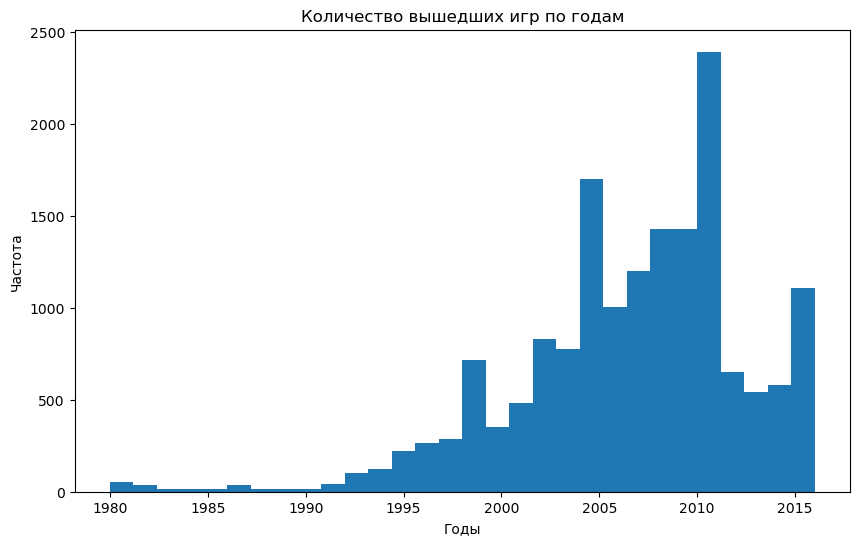

In [40]:
# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(data_games['year_of_release'], bins=30)
plt.title('Количество вышедших игр по годам')
plt.xlabel('Годы')
plt.ylabel('Частота')

# Отображаем гистограмму
plt.show()

Для того чтобы понять какие периоды на данном графике важны, а какие можно отбросить. Выведем список названий всех консолей в данном датафрейме. 

In [41]:
data_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Имея данный список, мы можем узнать на каких консолях перестали выходить игры, в разные годы. 

• Поддержка Wii, была официально прекращёна в октябре 2013 года.

• Поддержка NES, была официально прекращёна в 1995

• Поддержка игровой консоли Game Boy (GB) была прекращена 23 марта 2003 года.

• Поддержка игровой консоли Nintendo DS прекращена 31 августа 2013 года.

• Поддержка игровой консоли X360 прекращена 20 апреля 2016 года.

• Поддержка игровой консоли PS3 прекращена 29 мая 2017 года.

• Поддержка игровой консоли PS2 прекращена в 2013.

• Поддержка игровой консоли SNES прекращена в 1999.

• Поддержка игровой консоли GBA прекращена в декабре 2009.

• Поддержка игровой консоли PS4 не прекращена.

• Поддержка игровой консоли 3DS прекращена 17 сентября 2020 года.

• Поддержка игровой консоли N64 прекращена 30 апреля 2002 года.

• Поддержка игровой консоли PS прекращена 23 марта 2006 года.

• Поддержка игровой консоли XB прекращена в 2005.

• Поддержка игровой консоли PC  не прекращена.

• Поддержка игровой консоли 2600 прекращена 1 января 1992 года.

• Поддержка игровой консоли PSP прекращена в 2014.

• Поддержка игровой консоли XOne не прекращена.

• Поддержка игровой консоли WiiU прекращена в 2017 .

• Поддержка игровой консоли GC прекращена в 2007.

• Поддержка игровой консоли GEN прекращена в 2006.

• Поддержка игровой консоли PSV прекращена в 2019.

• Поддержка игровой консоли SCD прекращена в 1996.

• Поддержка игровой консоли WS прекращена в 2003.

• Поддержка игровой консоли NG прекращена в 2004.

• Поддержка игровой консоли TG16 прекращена в 1994.

• Поддержка игровой консоли 3DO прекращена в 1996.

• Поддержка игровой консоли GG прекращена в 1997.

• Поддержка игровой консоли PCFX прекращена в 1998.

Мы видим большое количество устаревших консолей, которые давно прекратили свой жизненный цикл. В 2013 году мы выдим выход нового поколения консолей. Что ознаменовало провал общих продаж. Так как в дальнейлем, основные продажи вероятно осуществлялись именно на консолях этого поколения.

### Продажи по платформам.

**Посмотрим, как менялись продажи по платформам за весь период их существования.**

In [42]:
pivot_total_sales = data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
pivot_total_sales.sort_values(by='total_sales', ascending=False).head(20)


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


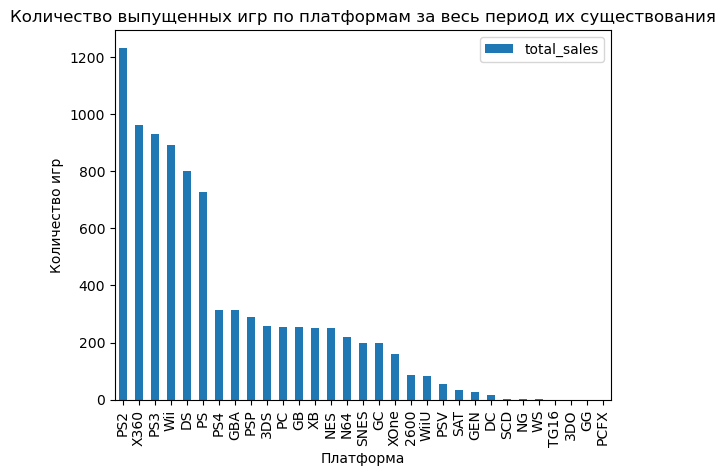

In [43]:
# Создаем столбчатую диаграмму
games_per_platform = data_games.pivot_table(
    index = 'platform', 
    values = 'total_sales', 
    aggfunc = 'sum')
games_per_platform.sort_values(by = 'total_sales', ascending = False).plot(kind = 'bar');
plt.title('Количество выпущенных игр по платформам за весь период их существования')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')

# Поворот меток на оси X для удобства
plt.xticks(rotation=90)

# Отображаем диаграмму
plt.show()

За весь период самые продаваемые игры на консолях: PS2, X360, PS3. 
Например, PS2 и X360 имели долгий жизненный цикл существования, например PS2 существовала 12 лет. Соответсвенно огромную популярность.

**Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [44]:

pivot_total_sales_per_year = data_games.pivot_table(
    index='platform',
    columns='year_of_release',
    values='total_sales', 
    aggfunc='sum',
    fill_value=0
)


# Добавим новый столбец с общими продажами по каждой платформе
pivot_total_sales_per_year['total_sales'] = pivot_total_sales_per_year.sum(axis=1)

# Сортируем по суммарным продажам
pivot_total_sales_per_year = pivot_total_sales_per_year.sort_values(by='total_sales', ascending=False)


pivot_total_sales_per_year.head(18)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total_sales
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PS2,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1233.56
X360,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,0.0,0.0,0.0,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.78
PS,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.03,35.96,94.70,136.17,169.49,144.53,96.37,35.59,6.67,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,727.58
PS4,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
GBA,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88
PSP,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,0.00,289.53


В данной таблице мы можем четко увидеть жизненный цикл каждой консоли по годам.

Как и обозначалось ранее, Мы видим большое количество устаревших консолей, которые давно прекратили свой жизненный цикл.Начиная с 2004 году вышли такие консоли как, X360, PS3, Wii, DS. Отбросим все данные, до 2004 так как они утратили свою актуальность.

In [45]:
filtered_2004_year_data_games = data_games.loc[data_games['year_of_release']>=2004]

pivot_total_sales_per_year_2004 = filtered_2004_year_data_games.pivot_table(
    index='platform',
    columns='year_of_release',
    values='total_sales', 
    aggfunc='sum',
    fill_value=0
)


# Добавим новый столбец с общими продажами по каждой платформе
pivot_total_sales_per_year_2004['total_sales'] = pivot_total_sales_per_year_2004.sum(axis=1)

# Сортируем по суммарным продажам
pivot_total_sales_per_year_2004 = pivot_total_sales_per_year_2004.sort_values(by='total_sales', ascending=False)


pivot_total_sales_per_year_2004.head(18)

year_of_release,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total_sales
platform,,,,,,,,,,,,,,
X360,0.00,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,0.00,0.00,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,0.00,0.00,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.76
PS2,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,638.27
PS4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
PSP,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,0.00,289.53
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14,257.81
PC,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,178.18


В данной таблице мы можем четко увидеть жизненный цикл каждой консоли по годам начиная с 2004 года.

Визуализируем распределение продаж самых популярных консолей по годам. Это поможет увидеть, как появляются и исчезают платформы.

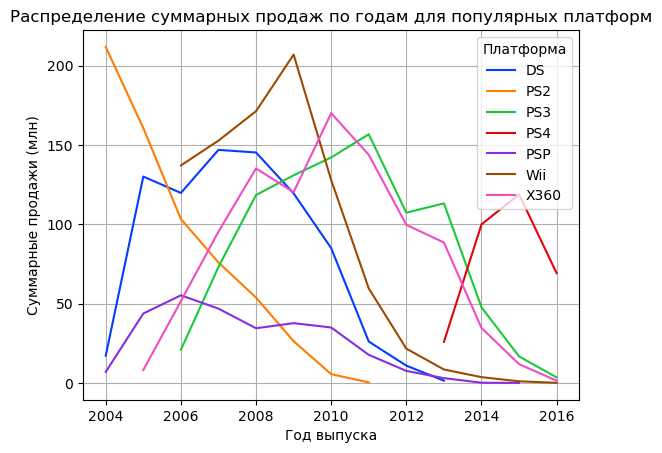

In [46]:
# Шаг 1: Сортируем платформы по продажам и выбираем топ-15 платформ
top_platforms_2004 = filtered_2004_year_data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(7).index

# Шаг 2: Ограничиваем исходный датафрейм только платформами из топ-15
top_platform_sales_by_year_2004 = filtered_2004_year_data_games.loc[data_games['platform'].isin(top_platforms_2004)]


# Агрегируем данные по платформам и годам выпуска
platform_sales_by_year_2004_visual = top_platform_sales_by_year_2004.pivot_table(
    index=['platform', 'year_of_release'],
    values='total_sales', 
    aggfunc='sum',
    fill_value=0
).reset_index()



sns.lineplot(
    x="year_of_release", 
    y="total_sales",
    data=platform_sales_by_year_2004_visual,
    palette='bright',
    hue='platform',
    markers=True)

plt.title('Распределение суммарных продаж по годам для популярных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн)')
plt.grid(True)
plt.legend(title='Платформа')
plt.show()

На данном графике мы видим общее кличество продаж для каждой платформы на протяжении нескольких лет. В целом можно сказать, что поколение консолей обновляется примерно каждые 7-9 лет. Таким образом актуальным периодом мы можем считать период с 2013 года т.к. на  графике мы видим угасание жизненного цикла консолей предыдущего поколения и начило нового скачка, а именно в этот обновилось поколение консолей PlayStation 4.

###  Возьмем данные за соответствующий актуальный период. 

Для дальнейшего анализа выберем данные за последние несколько лет с 2013 года, так как они отражают актуальную ситуацию. И как мы поняли ранее, с этого периода начался старт консолей нового поколения.

In [47]:
filtered_2013_year_data_games = data_games.loc[data_games['year_of_release']>=2013]

pivot_total_sales_per_year_2013 = filtered_2013_year_data_games.pivot_table(
    index='platform',
    columns='year_of_release',
    values='total_sales', 
    aggfunc='sum',
    fill_value=0
)


# Добавим новый столбец с общими продажами по каждой платформе
pivot_total_sales_per_year_2013['total_sales'] = pivot_total_sales_per_year_2013.sum(axis=1)

# Сортируем по суммарным продажам
pivot_total_sales_per_year_2013 = pivot_total_sales_per_year_2013.sort_values(by='total_sales', ascending=False)


pivot_total_sales_per_year_2013.head(15)

year_of_release,2013,2014,2015,2016,total_sales
platform,,,,,
PS4,25.99,100.00,118.90,69.25,314.14
PS3,113.25,47.76,16.82,3.60,181.43
XOne,18.96,54.07,60.14,26.15,159.32
3DS,56.57,43.76,27.78,15.14,143.25
X360,88.58,34.74,11.96,1.52,136.80
WiiU,21.65,22.03,16.35,4.60,64.63
PC,12.38,13.28,8.52,5.25,39.43
PSV,10.59,11.90,6.25,4.25,32.99
Wii,8.59,3.75,1.14,0.18,13.66


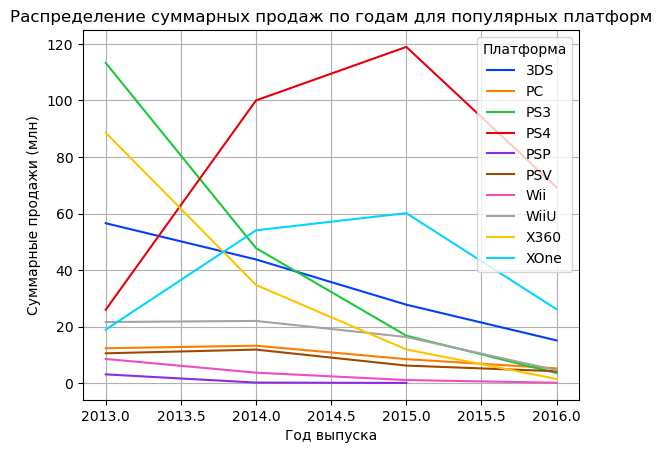

In [48]:
# Шаг 1: Сортируем платформы по продажам и выбираем топ-15 платформ
top_platforms_2013 = filtered_2013_year_data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

# Шаг 2: Ограничиваем исходный датафрейм только платформами из топ-15
top_platform_sales_by_year_2013 = filtered_2013_year_data_games.loc[data_games['platform'].isin(top_platforms_2013)]


# Агрегируем данные по платформам и годам выпуска
platform_sales_by_year_2013_visual = top_platform_sales_by_year_2013.pivot_table(
    index=['platform', 'year_of_release'],
    values='total_sales', 
    aggfunc='sum',
    fill_value=0
).reset_index()



sns.lineplot(
    x="year_of_release", 
    y="total_sales",
    data=platform_sales_by_year_2013_visual,
    palette='bright',
    hue='platform',
    markers=True)

plt.title('Распределение суммарных продаж по годам для популярных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн)')
plt.grid(True)
plt.legend(title='Платформа')
plt.show()

Из графика по годам видно, что продажи игор на консолях старого поколения такие как PS3, X360, 3DS с каждым годом падают. В то время как, консоли нового поколения PS4 и Xbox One, набирают популярность и и можно считать наиболее перспективными платформами в плане продаж игор. 



### Построим графики "ящиков с усами" по глобальным продажам игр и разбивкой по платформам.

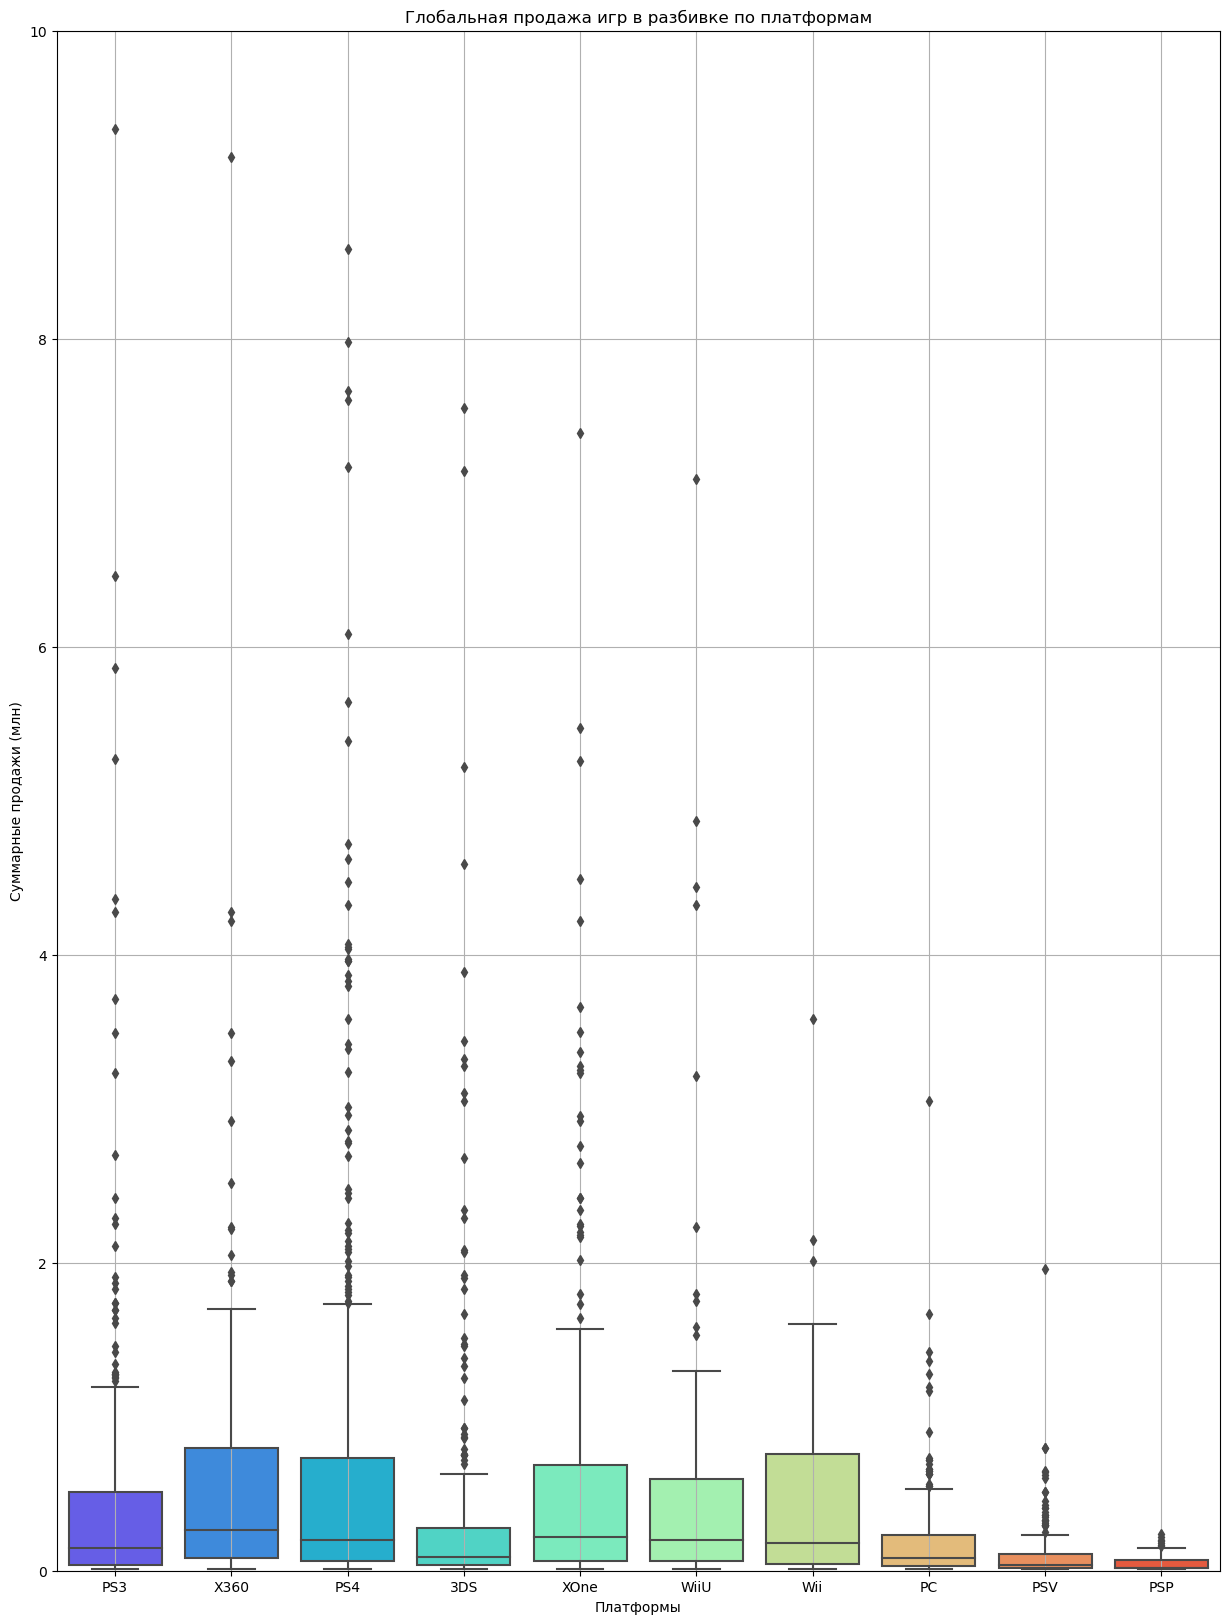

In [49]:
plt.figure(figsize = (15,20))
plt.ylim(0, 10)
sns.boxplot(
    x="platform", 
    y="total_sales", 
    data=top_platform_sales_by_year_2013, 
    palette='rainbow',
)

plt.title('Глобальная продажа игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи (млн)')
plt.grid(True)

plt.show()

Из графика видим, что игры, в основном продаются до 2 млн. копий по всем платформам. 

### Влияние отзывов на продажи.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируем выводы.

В качествое популярной платформы выберем PS4 и XOne, как наиболее популярные консоли нового поколения.

**Создадим отдельный датафрейм с данными по играм, выходящими на консоли PS4.**

In [50]:
ps4_platform_sales_by_year_2013 = top_platform_sales_by_year_2013.query('platform == "PS4"')
sort_ps4_platform_sales_by_year_2013 = ps4_platform_sales_by_year_2013.sort_values(by='total_sales', ascending=False)
sort_ps4_platform_sales_by_year_2013.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,2015-01-01,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,2014-01-01,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,2015-01-01,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,2015-01-01,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,2014-01-01,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,2016-01-01,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,2015-01-01,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,2014-01-01,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,2014-01-01,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,2016-01-01,5.39


Построем диаграмму рассеяния того, как влияют на продажи внутри платформы PS4 отзывы критиков.

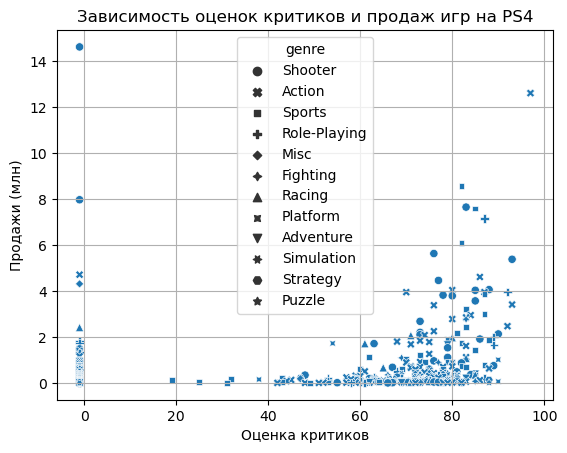

Корреляция между оценками критиков и продажами составляет: 0.227


In [51]:
# Построение диаграммы рассеяния PS4 оценок критиков
sns.scatterplot(
    x='critic_score', 
    y='total_sales', 
    data=ps4_platform_sales_by_year_2013,  
    style='genre')

plt.title('Зависимость оценок критиков и продаж игр на PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн)')
plt.grid(True)

plt.show()

# Корреляция между оценками критиков и продажами
correlation_ps4_critic_score = ps4_platform_sales_by_year_2013['total_sales'].corr(ps4_platform_sales_by_year_2013['critic_score'])
print(f'Корреляция между оценками критиков и продажами составляет: {correlation_ps4_critic_score:.3f}')



Построем диаграмму рассеяния того, как влияют на продажи внутри платформы PS5 отзывы пользователей.

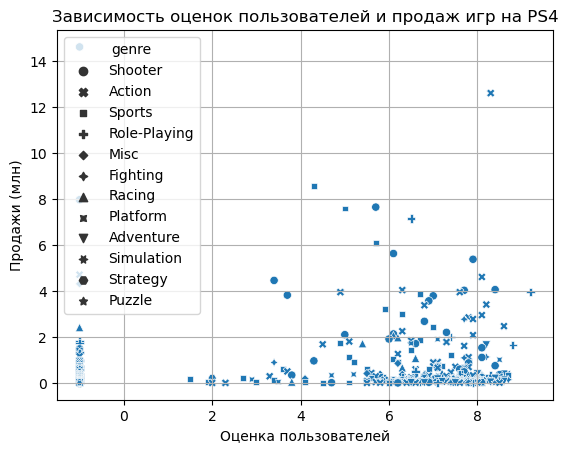

Корреляция между оценками пользователей и продажами составляет: 0.116


In [52]:
# Построение диаграммы рассеяния PS4 оценок пользователей
sns.scatterplot(
    x='user_score', 
    y='total_sales', 
    data=ps4_platform_sales_by_year_2013,  
    style='genre')

plt.title('Зависимость оценок пользователей и продаж игр на PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн)')
plt.grid(True)

plt.show()

# Корреляция между оценками пользователей и продажами
correlation_ps4_user_score = ps4_platform_sales_by_year_2013['total_sales'].corr(ps4_platform_sales_by_year_2013['user_score'])
print(f'Корреляция между оценками пользователей и продажами составляет: {correlation_ps4_user_score:.3f}')


**Создадим отдельный датафрейм с данными по играм, выходящими на консоли XOne.**

In [53]:
xone_platform_sales_by_year_2013 = top_platform_sales_by_year_2013.query('platform == "XOne"')
sort_xone4_platform_sales_by_year_2013 = xone_platform_sales_by_year_2013.sort_values(by='total_sales', ascending=False)
sort_xone4_platform_sales_by_year_2013.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,unknown,2015-01-01,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,2014-01-01,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,2014-01-01,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,2015-01-01,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,2015-01-01,4.22
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,-1.0,-1.0,unknown,2015-01-01,3.66
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,2014-01-01,3.50
398,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75.0,5.5,T,2014-01-01,3.37
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,2015-01-01,3.28
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,2015-01-01,3.25


Построем диаграмму рассеяния того, как влияют на продажи внутри платформы XOne отзывы критиков.

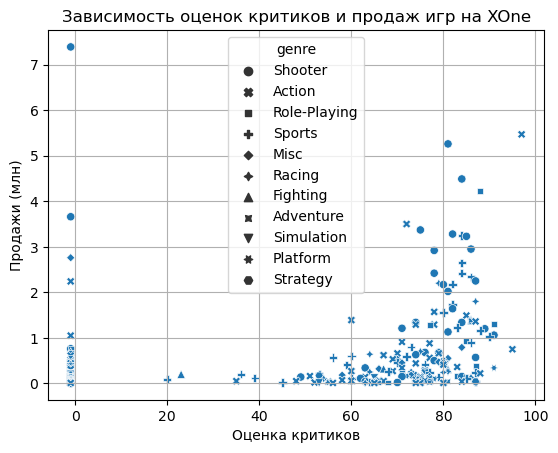

Корреляция между оценками критиков и продажами составляет: 0.274


In [54]:
# Построение диаграммы рассеяния Xone оценок критиков
sns.scatterplot(
    x='critic_score', 
    y='total_sales', 
    data=xone_platform_sales_by_year_2013,  
    style='genre')

plt.title('Зависимость оценок критиков и продаж игр на XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн)')
plt.grid(True)

plt.show()

# Корреляция между оценками критиков и продажами
correlation_xone_critic_score = xone_platform_sales_by_year_2013['total_sales'].corr(xone_platform_sales_by_year_2013['critic_score'])
print(f'Корреляция между оценками критиков и продажами составляет: {correlation_xone_critic_score:.3f}')


Построем диаграмму рассеяния того, как влияют на продажи внутри платформы XOne отзывы пользователей.

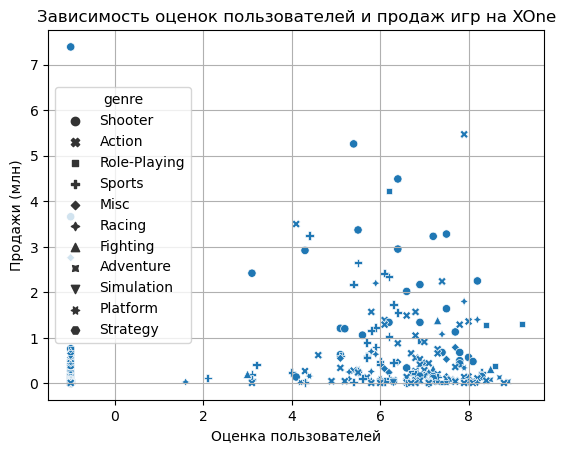

Корреляция между оценками пользователей и продажами составляет: 0.122


In [55]:
# Построение диаграммы рассеяния Xone оценок пользователей
sns.scatterplot(
    x='user_score', 
    y='total_sales', 
    data=xone_platform_sales_by_year_2013,  
    style='genre')

plt.title('Зависимость оценок пользователей и продаж игр на XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн)')
plt.grid(True)

plt.show()

# Корреляция между оценками пользователей и продажами
correlation_xone_user_score = xone_platform_sales_by_year_2013['total_sales'].corr(xone_platform_sales_by_year_2013['user_score'])
print(f'Корреляция между оценками пользователей и продажами составляет: {correlation_xone_user_score:.3f}')


**Вывод:**

Корреляция между оценками критиков и продажами, равная 0.227 и 0.274, говорит о слабой положительной связи между этими переменными. Это означает, что игры с более высокими оценками критиков имеют тенденцию продаваться лучше, но связь между этими факторами не является сильной.
Оценки критиков влияют на продажи, но не являются основным определяющим фактором.
Вероятно, существуют и другие важные переменные, которые сильнее влияют на продажи игр (например, платформа, жанр, маркетинговая стратегия

Корреляция между оценками пользователей и продажами составляет 0.116 и 0.122. Это указывает на слабую положительную связь между этими показателями. Это означает, что хотя существует некоторая зависимость между оценками пользователей и продажами, она не является сильной, и другие факторы, скорее всего, оказывают более значительное влияние на успех игры.

### Распределение игр по жанрам.

Посмотрим общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

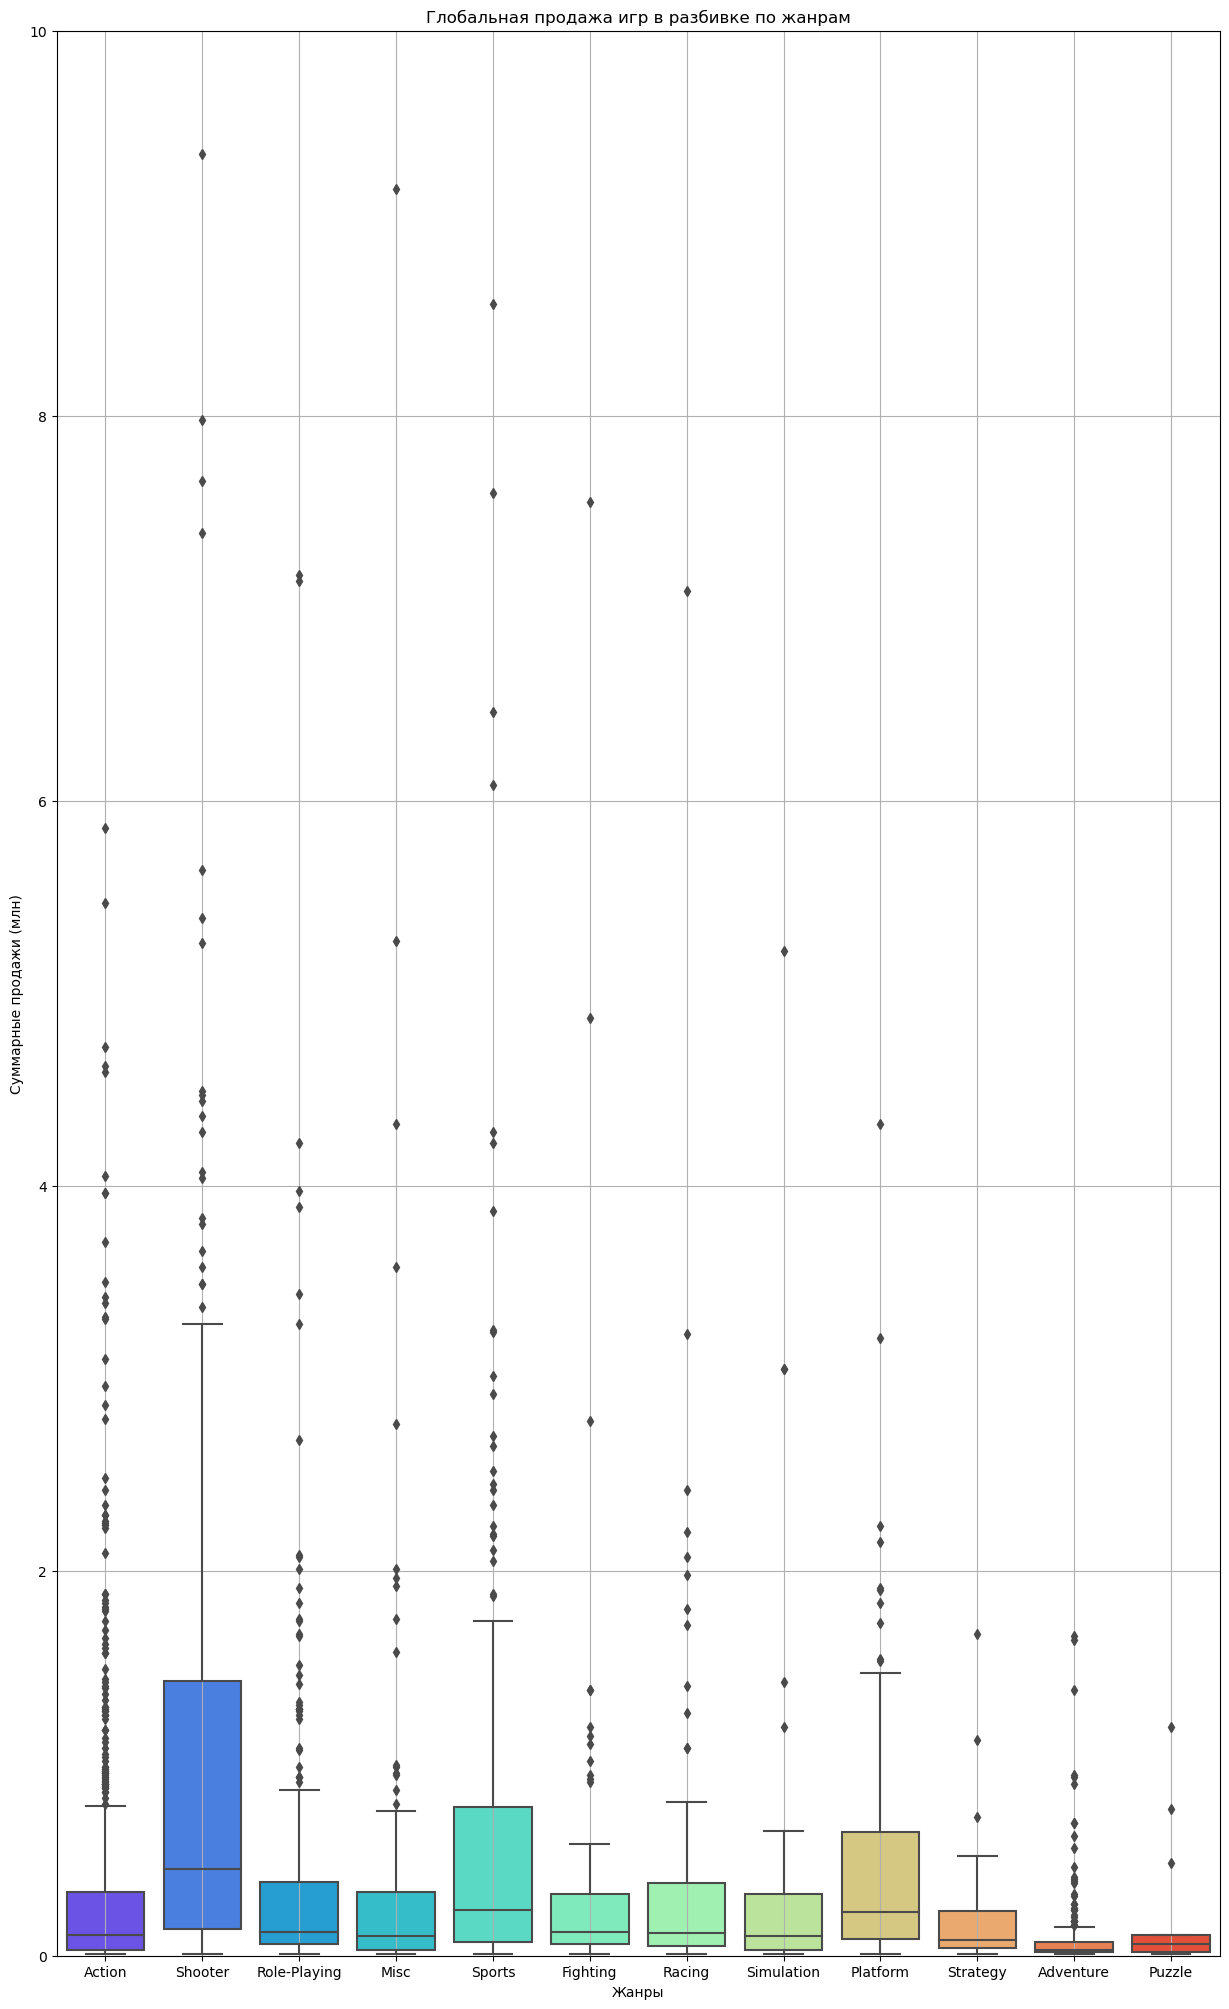

In [56]:
plt.figure(figsize = (15,25))
plt.ylim(0, 10)
sns.boxplot(
    x="genre", 
    y="total_sales", 
    data=top_platform_sales_by_year_2013, 
    palette='rainbow',
)

plt.title('Глобальная продажа игр в разбивке по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи (млн)')
plt.grid(True)

plt.show()

Смотря на график можно сказать, что самый продаваемый жанр это шутер. В то время как меньше всего продаются пазлы и адвенчуры.

### Вывод: Исследовательский анализ данных.

– Проведя исследовательский анализ данных мы выяснили, что начиная с 2013 года, массово начали приобритать популярность, консоли нового поколения. Такие как, PS4 и Xbox One. Их можно считать наиболее перспективными платформами в плане продаж игор на ближайшее будущее.

– Построив график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Мы видим, что игры, в основном продаются до 2 млн. копий по всем платформам.

– Посмотрев, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Мы выяснили, что игры с более высокими оценками критиков имеют тенденцию продаваться лучше, но связь между этими факторами не является сильной. Оценки критиков влияют на продажи, но не являются основным определяющим фактором. Так же выяснили, что оценки пользователей почти никак не вляют на продажи игор. 

– Посмотрев на общее распределение игр по жанрам. Мы выяснили, что самый продаваемый жанр это шутер. В то время как меньше всего продаются пазлы и адвенчуры.

## Этап 4. Составьте портрет пользователя каждого региона

### Самые популярные платформы, жанры.

In [57]:
top_platform_sales_by_year_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,2013-01-01,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,2013-01-01,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,2015-01-01,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,2013-01-01,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,2014-01-01,12.62


**В Северной Америке:**

Определим самые популярные платформы (топ-5) c 2013 года.

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


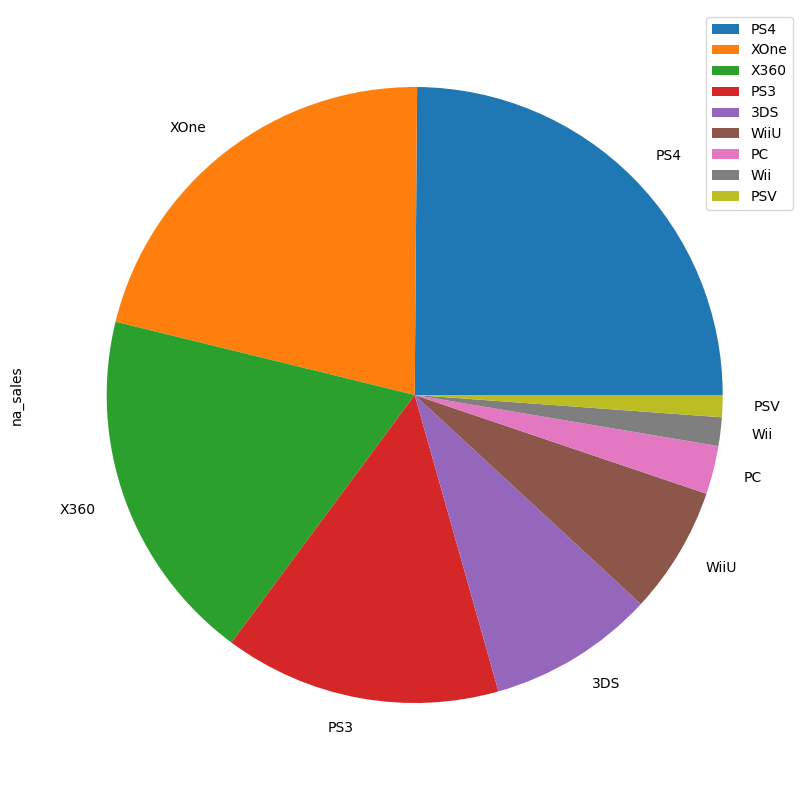

In [58]:
na_sales_platform_2013 = top_platform_sales_by_year_2013.pivot_table(index = 'platform', 
                     values = 'na_sales',
                     aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False )
na_sales_platform_2013.plot(kind = 'pie', subplots=True, figsize = (10, 10));
na_sales_platform_2013.head()

Мы выявили самые популярные платформы в Северной Америке c 2013 года. Это PS4, XOne, X360, PS3, 3DS.

Определим самые популярные жанры (топ-5) c 2013 года.

,na_sales
genre,
Action,125.83
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.46


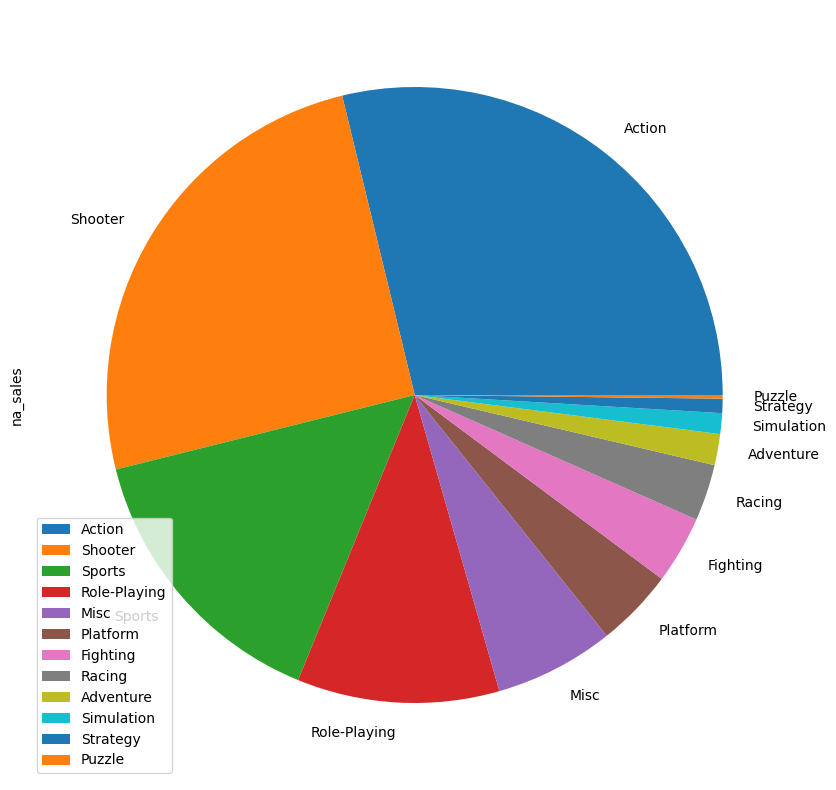

In [59]:
na_sales_genre_2013 = top_platform_sales_by_year_2013.pivot_table(index = 'genre', 
                     values = 'na_sales',
                     aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False )
na_sales_genre_2013.plot(kind = 'pie', subplots=True, figsize = (10, 10));
na_sales_genre_2013.head()

Мы выявили самые популярные жанры в Северной Америке - это Экшены и Шутеры.

Определим, влияет ли рейтинг ESRB на продажи.

In [60]:
na_rating_sales = (top_platform_sales_by_year_2013
                                .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_rating_sales['na_ratio'] = round(na_rating_sales['na_sales'] / sum(na_rating_sales['na_sales']), 3)
na_rating_sales


,rating,na_sales,na_ratio
0,M,165.21,0.378
1,unknown,89.18,0.204
2,E,78.94,0.181
3,E10+,54.02,0.124
4,T,49.79,0.114


В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры c рейтингом M ("для взрослых") - 37% от продаж;

на втором месте игры , которые мы пометили, как неопределенный рейтинг - 20%

на третьем месте игры с рейтингом E ("для всех") - 18%;

**В Европе:**

Определим самые популярные платформы (топ-5) c 2013 года.

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


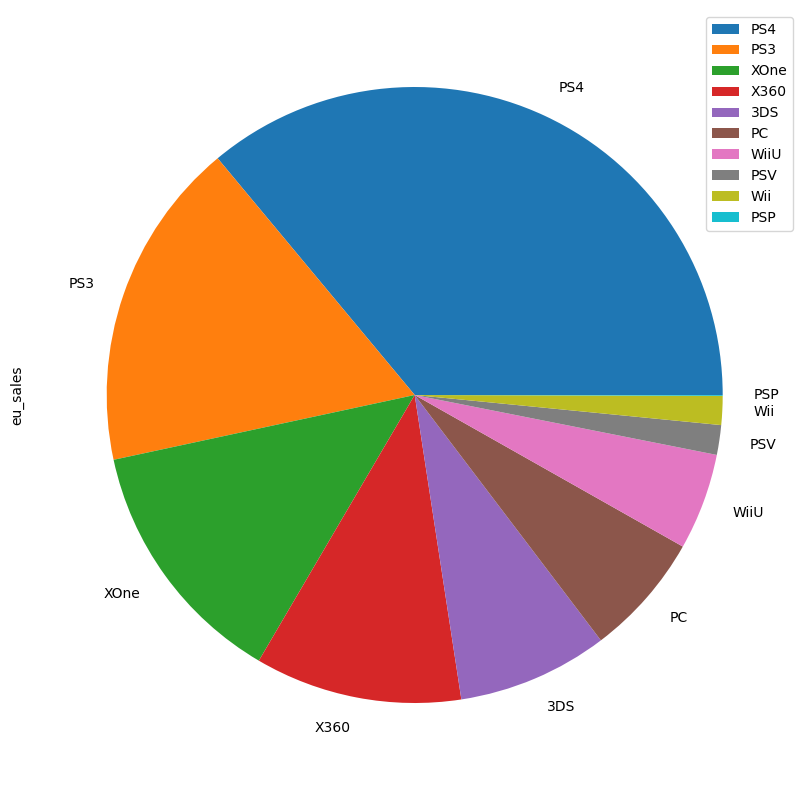

In [61]:
eu_sales_platform_2013 = top_platform_sales_by_year_2013.pivot_table(index = 'platform', 
                     values = 'eu_sales',
                     aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False )
eu_sales_platform_2013.plot(kind = 'pie', subplots=True, figsize = (10, 10));
eu_sales_platform_2013.head()

Мы выявили самые популярные платформы в Европе c 2013 года. Это PS4, PS3, XOne, X360, 3DS.

Определим самые популярные жанры (топ-5) c 2013 года.

,eu_sales
genre,
Action,117.89
Shooter,87.86
Sports,60.49
Role-Playing,36.97
Racing,20.19


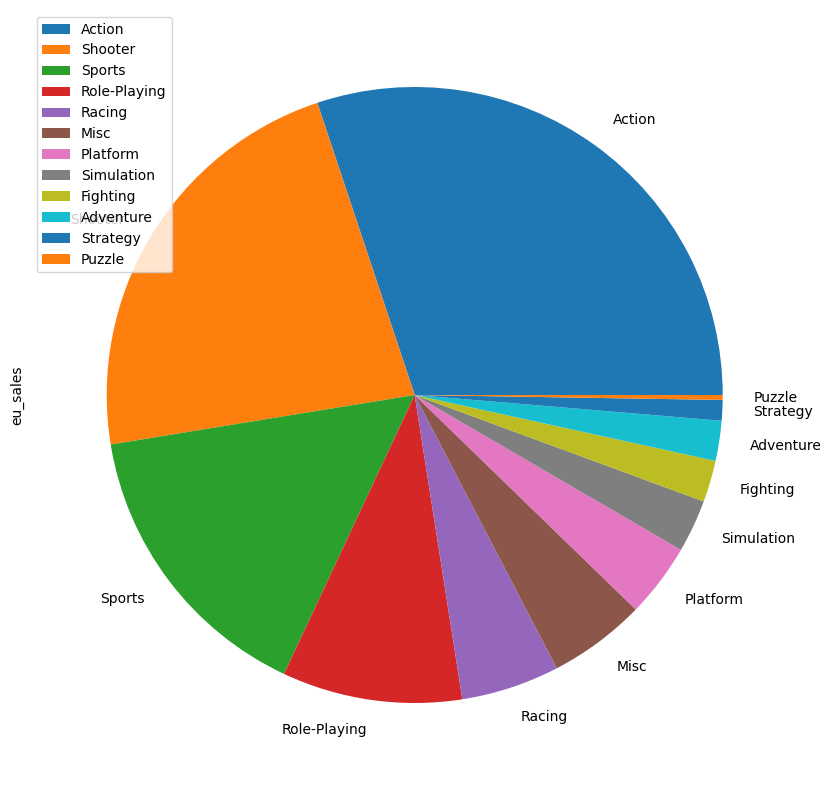

In [62]:
eu_sales_genre_2013 = top_platform_sales_by_year_2013.pivot_table(index = 'genre', 
                     values = 'eu_sales',
                     aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False )
eu_sales_genre_2013.plot(kind = 'pie', subplots=True, figsize = (10, 10));
eu_sales_genre_2013.head()

Мы выявили самые популярные жанры в Европе - это Экшены и Шутеры.

Определим, влияет ли рейтинг ESRB на продажи.

In [63]:
eu_rating_sales = (top_platform_sales_by_year_2013
                                .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_rating_sales['eu_ratio'] = round(eu_rating_sales['eu_sales'] / sum(eu_rating_sales['eu_sales']), 3)
eu_rating_sales


,rating,eu_sales,eu_ratio
0,M,145.32,0.371
1,E,82.97,0.212
2,unknown,78.61,0.201
3,E10+,42.53,0.109
4,T,41.95,0.107


В Европе наиболее продаваемыми играми за анализируемый период являются игры c рейтингом M ("для взрослых") - 37% от продаж;

на втором месте игры, с рейтингом E ("для всех") - 21%

на третьем месте игры, которые мы пометили, как неопределенный рейтинг  - 20%;

**В Японии:**

Определим самые популярные платформы (топ-5) c 2013 года.

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


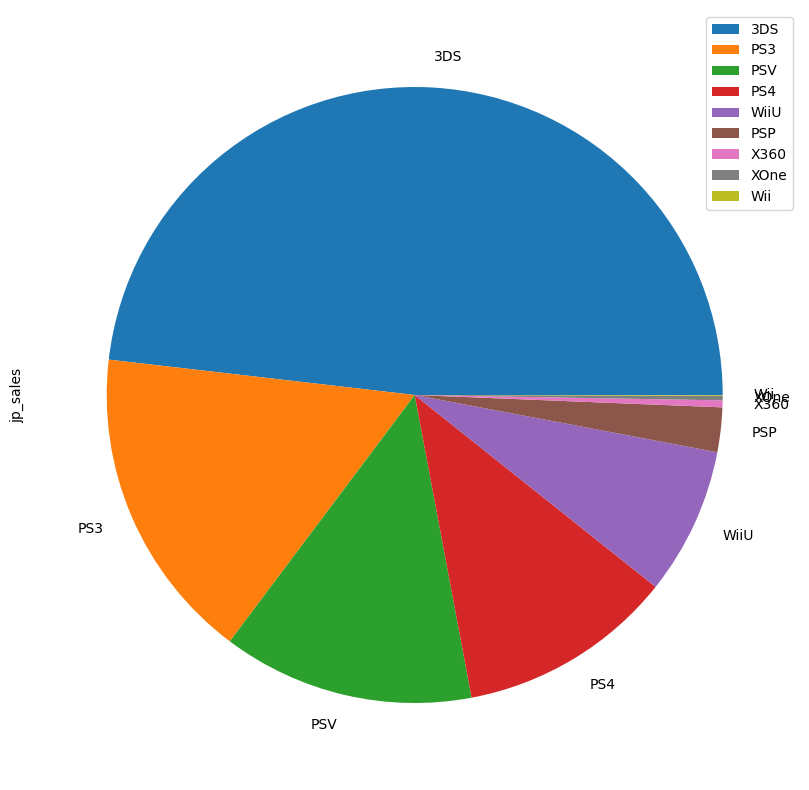

In [64]:
jp_sales_platform_2013 = top_platform_sales_by_year_2013.pivot_table(index = 'platform', 
                     values = 'jp_sales',
                     aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False )
jp_sales_platform_2013.plot(kind = 'pie', subplots=True, figsize = (10, 10));
jp_sales_platform_2013.head()

Мы выявили самые популярные платформы в Японии c 2013 года. Это 3DS, PS3, PSV, PS4, WiiU.

Определим самые популярные жанры (топ-5) c 2013 года.

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


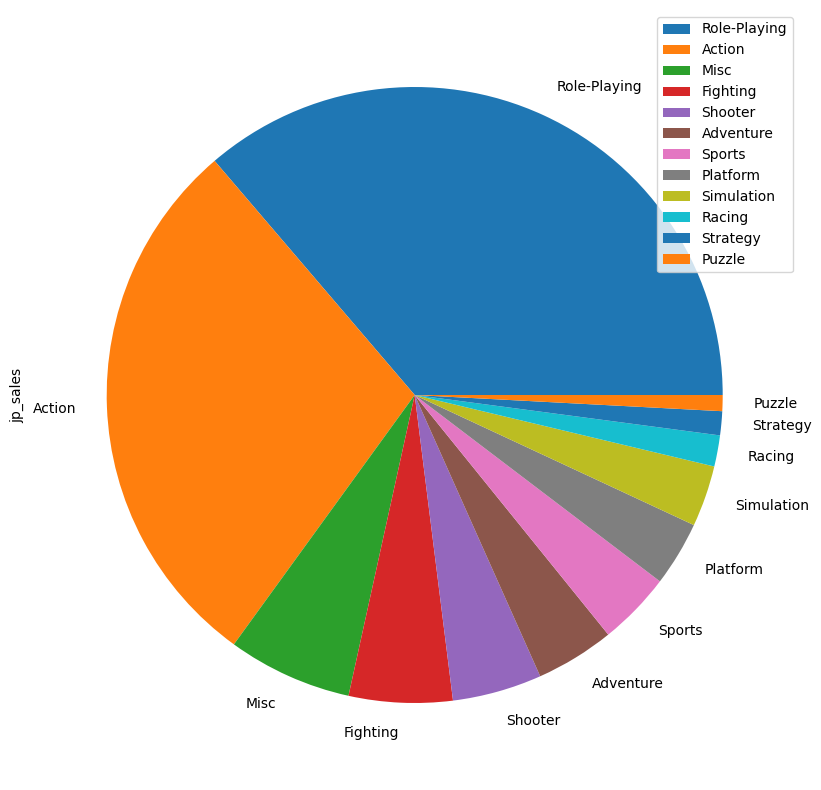

In [65]:
jp_sales_genre_2013 = top_platform_sales_by_year_2013.pivot_table(index = 'genre', 
                     values = 'jp_sales',
                     aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False )
jp_sales_genre_2013.plot(kind = 'pie', subplots=True, figsize = (10, 10));
jp_sales_genre_2013.head()

Мы выявили самые популярные жанры в Японии - это Ролевые игры и Экшены.

Определим, влияет ли рейтинг ESRB на продажи.

In [66]:
jp_rating_sales = (top_platform_sales_by_year_2013
                                .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_rating_sales['jp_ratio'] = round(jp_rating_sales['jp_sales'] / sum(jp_rating_sales['jp_sales']), 3)
jp_rating_sales


,rating,jp_sales,jp_ratio
0,unknown,85.05,0.604
1,T,20.59,0.146
2,E,15.14,0.108
3,M,14.11,0.100
4,E10+,5.89,0.042


В Японии наиболее продаваемыми играми за анализируемый период являются игры, которые мы пометили, как неопределенный рейтинг - 60% от продаж;

на втором месте игры, с рейтингом T («Teen») - 14%

на третьем месте игры, с рейтингом E ("Everyone")  -10%

### Вывод: Составьте портрет пользователя каждого региона.

Таким образом, в Северной Америке и Европе схожая структура продаж по рейтингу игр. В Японии предпочтения отличаются: подростковые игры более популярны, чем игры для взрослых. На игры для детей младшего возраста нет спроса ни в одном регионе.

## Этап 5. Проверка статистических гипотез

### Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Цель:** Важно понять, Средние пользовательские рейтинги платформ Xbox One и PC одинаковые или нет? Если нет, то лучше сделать акцент на какой-то одной игровой платформе.

**H0 (нулевая гипотеза):**  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (не отличаются).

**H1 (альтернативная гипотеза):**  Средние пользовательские рейтинги платформ Xbox One и PC разные (Отличаются в большую или меньшую сторону).

**Уровень значимости (alpha):** Уровень значимости устанавливается на уровне 0.05.

**Метод проверки гипотезы:** Двусторонний t-тест для независимых выборок. Этот тест подходит, так как сравниваются два набора данных, которые являются независимыми.

In [70]:
# Допустим, у нас есть два набора данных с пользовательскими оценками для Xbox One и PC
xbox_one_ratings = top_platform_sales_by_year_2013[top_platform_sales_by_year_2013['platform'] == 'XOne']['user_score']
pc_ratings = top_platform_sales_by_year_2013[top_platform_sales_by_year_2013['platform'] == 'PC']['user_score']


# Проведение t-теста
t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, alternative = 'two-sided')

# Вывод результатов
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")


# Сравнение p-значения с уровнем значимости alpha
alpha = 0.05
if p_value < alpha:
    print("Мы отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC совпадают.")

T-статистика: -1.280327053007019
P-значение: 0.20111399900783597
Мы не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC совпадают.


**Интерпретация результатов:**

• T-статистика показывает, насколько сильно отличаются средние значения двух групп. Чем дальше T-статистика от 0 (положительное или отрицательное значение), тем больше различие между выборками.

• P-значение — это вероятность того, что мы получили такой результат случайно, при условии, что нулевая гипотеза верна. Если p-значение меньше 0.05, то различие между средними значениями считается статистически значимым. Так как p-значение (0.201) значительно больше стандартного уровня значимости (обычно 0.05), мы не можем отвергнуть нулевую гипотезу.

**Вывод:**

Средние пользовательские рейтинги на этих двух платформах, скорее всего, совпадают. Таким образом, акцент на одну из этих платформ, основываясь только на различиях в пользовательских рейтингах, может быть нецелесообразным.

### Гипотеза №2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Цель:** Важно понять, cредние пользовательские рейтинги жанров Action и Sports разные, или нет? Если нет, то лучше сделать акцент на каком-то одном, конкретном жанре игр.

**H0 (нулевая гипотеза):** Средние пользовательские рейтинги жанров Action и Sports одинаковые (не отличаются).

**H1 (альтернативная гипотеза):** Средние пользовательские рейтинги жанров Action и Sports разные (Отличаются в большую или меньшую сторону).

**Уровень значимости (alpha):** Уровень значимости устанавливается на уровне 0.05.

**Метод проверки гипотезы:** Двусторонний t-тест для независимых выборок. Этот тест подходит, так как сравниваются два набора данных, которые являются независимыми.

In [74]:
# Допустим, у нас есть два набора данных с пользовательскими оценками для Xbox One и PC
action_ratings  = top_platform_sales_by_year_2013[top_platform_sales_by_year_2013['genre'] == 'Action']['user_score']
sports_ratings  = top_platform_sales_by_year_2013[top_platform_sales_by_year_2013['genre'] == 'Sports']['user_score']


# Проведение t-теста
t_stat, p_value = stats.ttest_ind(action_ratings, sports_ratings, alternative = 'two-sided')

# Вывод результатов
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")


# Сравнение p-значения с уровнем значимости alpha
alpha = 0.05
if p_value < alpha:
    print("Мы отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковы.")

T-статистика: -2.353854486207636
P-значение: 0.018777529922685565
Мы отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.


**Вывод:**

P-значение равно 0.019, что меньше 0.05. Это означает, что есть статистически значимые различия между средними пользовательскими рейтингами жанров Action и Sports. Таким образом, данные показывают, что жанры Action и Sports воспринимаются пользователями по-разному в среднем, и это может быть важным фактором при выборе жанра для продвижения.

## Общий Вывод

Получив данные, была проделана большая работа по предобработке, исследовательскому анализу, составлению портрета регионов (Америка, Европа, Япония), были сформулированы и проверены гипотезы.

• Можно сказать, что поколение консолей обновляется примерно каждые 7-9 лет. Таким образом актуальным периодом, старта консолей нового поколения, мы можем считать период с 2013 года. Именно в этот период обновилось поколение консолей на PlayStation 4 и Xbox One.

• Выяснили, что оценки критиков влияют на продажи, но не являются основным определяющим фактором. Так же выяснили, что оценки пользователей почти никак не вляют на продажи игор.

• Мы выяснили, что игры, в основном продаются до 2 млн. копий по всем платформам.

• Посмотрев на общее распределение игр по жанрам. Мы выяснили, что самый продаваемый жанр это шутер. В то время как меньше всего продаются пазлы и адвенчуры.

• При составлении портрета пользовательских вкусов по регионам мы выявили, что вкусы игроков из Америки и Европы поти полностью совпадают. Со вкусами Японских геймеров дела обстаят иначе.

• Средние пользовательские рейтинги на этих двух платформах, скорее всего, совпадают. Таким образом, акцент на одну из этих платформ, основываясь только на различиях в пользовательских рейтингах, может быть нецелесообразным.

• Средние пользовательские рейтинги жанров Action и Sports разные. Таким образом, данные показывают, что жанры Action и Sports воспринимаются пользователями по-разному в среднем, и это может быть важным фактором при выборе жанра для продвижения.

Рынок уже на протяжении почти уже 10 лет падает, вероятно из-за того, что затраты на разработку игр растут, т.к. требования игроков с каждым готом повышаются. Пользователь хочет технологичных и красивах игор.  Необходимо привлекать крупные инвестиции, прежде, чем начинать разработку игры.